# Project_2: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">1 - Introduction</a></li>
<li><a href="#wrangling">2 - Data Wrangling</a></li>
<li><a href="#eda">3 - Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4 - Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1 - Introduction

###    Dataset brief

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

* Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
* There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
* The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Purpose

To find out
  1. Which genres have the best revenue?
  2. Which genres have the best popularity?
  3. Which genres have the best voting-average?
  4. Is there any correlation between Budget and Revenue?
  5. Is there any correlation between Budget and Popularity?
  6. Is there any correlation between Budget and Vote-Average?



### Tools to use

Pandas, Matplotlib



## 2 - Data Wrangling

In [1]:
# 1. Import pandas library, matplotlib, numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline


In [2]:
# 2. Read dataset and import dataset to notebook
df = pd.read_csv('/content/drive/MyDrive/Colab Google Data/tmdb-movies.csv')

In [3]:
# 3. Overview dataset
#   3.1 Check number of column and rows
df.shape

(10866, 21)

In [4]:
# 3. Overview dataset
#   3.2 Check name and datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# 3. Overview dataset
#   3.3 Scan details and define meaning of each column by having an overview firt 5 rows of dataset
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
# 4. Data Cleaning
#   4.1 Check duplicated and remove
#     4.1.1 Check duplicated
sum(df.duplicated())

1

In [7]:
# 4. Data Cleaning
#   4.1 Check duplicated and remove
#     4.1.2 Remove duplicated
df.drop_duplicates(inplace=True)

In [8]:
# 4. Data Cleaning
##   4.1 Check duplicated and remove
###     4.1.3 Recheck if duplicated rows already removed.
sum(df.duplicated()) == 0

True

In [9]:
# 4. Data Cleaning
##   4.2 Check null rows and remove
###      4.2.1 Check if there is missing data in dataset
df.isnull().values.any()

True

In [10]:
# 4. Data Cleaning
##   4.2 Check null rows and remove
###      4.2.1 Overview missing data base on each column
df.isnull().sum()


# >> most of missing data appear on homepage and tagline column
# >> consider that these 2 columns is not effect in question which I focus to anwser
# >> drop these 2 columns

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
# 4. Data Cleaning
##   4.2 Check null rows and remove
###      4.2.2 Drop columns which aren't used
df = df.drop(['homepage','tagline'], 1)
df.isnull().sum()

#a_dataframe.drop(a_dataframe.columns[0], axis=1, inplace=True)
#USE pd.DataFrame.drop() TO DELETE COLUMNS FROM A PANDAS DataFrame BY INDEX
# df.drop(['column_nameA', 'column_nameB'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## 3 - Exploratory Data Analysis

### 3.1 Explore "MOVIE GENRES"

#### Which movie genres have the most average revenue?

In [12]:
# create new dataframe which have 'genres' and 'revenue' column
df_genres = df[['genres','revenue']].copy()
df_genres


,genres,revenue
0,Action|Adventure|Science Fiction|Thriller,1513528810
1,Action|Adventure|Science Fiction|Thriller,378436354
2,Adventure|Science Fiction|Thriller,295238201
3,Action|Adventure|Science Fiction|Fantasy,2068178225
4,Action|Crime|Thriller,1506249360
...,...,...
10861,Documentary,0
10862,Action|Adventure|Drama,0
10863,Mystery|Comedy,0
10864,Action|Comedy,0


In [13]:
# split each row which have many genres into rows with only 1 genres

df_genres["genres"] = df_genres["genres"].str.split("|")
df_genres = df_genres.explode("genres").reset_index(drop=True)
df_genres
# df["Shape"]=df["Shape"].str.split("\r\n")
# print(df.explode("Shape").reset_index(drop=True))

,genres,revenue
0,Action,1513528810
1,Adventure,1513528810
2,Science Fiction,1513528810
3,Thriller,1513528810
4,Action,378436354
...,...,...
26973,Mystery,0
26974,Comedy,0
26975,Action,0
26976,Comedy,0


In [14]:
#calculate mean of revenue group by genres
df_genres_groupby = df_genres.groupby(['genres']).mean()
df_genres_groupby = df_genres_groupby.sort_values(by='revenue', ascending=False)
df_genres_groupby.head(5)


,revenue
genres,
Adventure,1.131379e+08
Fantasy,9.631366e+07
Animation,7.525606e+07
Action,7.279473e+07
Family,7.243318e+07


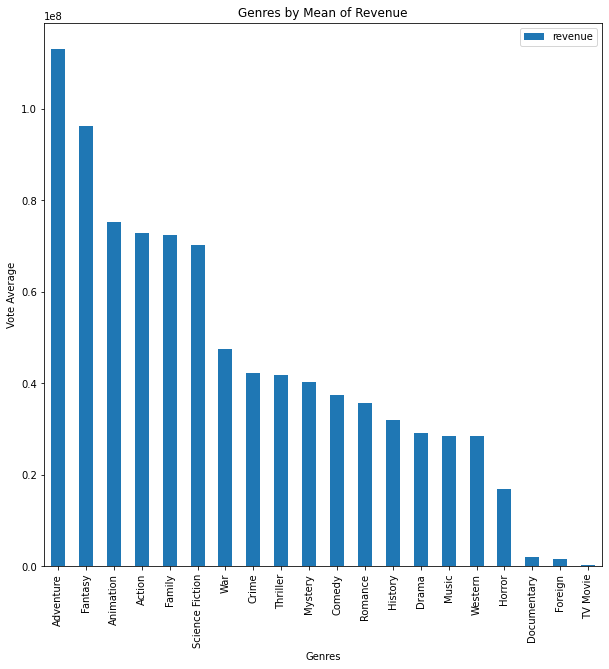

In [15]:
#Bar chart Genres by Mean of Revenue

df_genres_groupby.plot(kind='bar', title='Genres by Mean of Revenue', ylabel='Vote Average', xlabel='Genres', figsize=(10,10))

*Conclude: Movie with **Adventure Genres** have the highest revenue-average which producer can focus on this genres to make more profit.*

#### Which movie genres have the highest vote-average?

In [16]:
# create new dataframe which have 'genres' and 'revenue' column
df_genres = df[['genres','vote_average']].copy()
df_genres


,genres,vote_average
0,Action|Adventure|Science Fiction|Thriller,6.5
1,Action|Adventure|Science Fiction|Thriller,7.1
2,Adventure|Science Fiction|Thriller,6.3
3,Action|Adventure|Science Fiction|Fantasy,7.5
4,Action|Crime|Thriller,7.3
...,...,...
10861,Documentary,7.4
10862,Action|Adventure|Drama,5.7
10863,Mystery|Comedy,6.5
10864,Action|Comedy,5.4


In [17]:
# split each row which have many genres into rows with only 1 genres

df_genres["genres"] = df_genres["genres"].str.split("|")
df_genres = df_genres.explode("genres").reset_index(drop=True)
df_genres
# df["Shape"]=df["Shape"].str.split("\r\n")
# print(df.explode("Shape").reset_index(drop=True))

,genres,vote_average
0,Action,6.5
1,Adventure,6.5
2,Science Fiction,6.5
3,Thriller,6.5
4,Action,7.1
...,...,...
26973,Mystery,6.5
26974,Comedy,6.5
26975,Action,5.4
26976,Comedy,5.4


In [18]:
#calculate mean of vote_average group by genres
df_genres_groupby = df_genres.groupby(['genres']).mean()
df_genres_groupby = df_genres_groupby.sort_values(by='vote_average', ascending=False)
df_genres_groupby.head(5)


,vote_average
genres,
Documentary,6.908462
Music,6.480392
History,6.410479
Animation,6.403147
War,6.297778


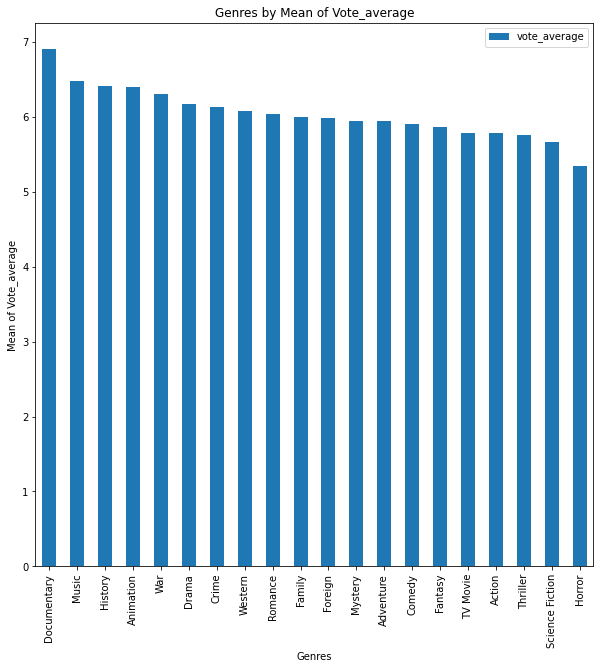

In [19]:
#Bar chart Genres by Mean of Vote_average

df_genres_groupby.plot(kind='bar', title='Genres by Mean of Vote_average', ylabel='Mean of Vote_average', xlabel='Genres', figsize=(10,10))

*Conclude: Movie with **Documentary Genres** have the highest vote-average*

#### Which movie genres have the highest popularity?

In [20]:
# create new dataframe which have 'genres' and 'revenue' column
df_genres = df[['genres','popularity']].copy()
df_genres


,genres,popularity
0,Action|Adventure|Science Fiction|Thriller,32.985763
1,Action|Adventure|Science Fiction|Thriller,28.419936
2,Adventure|Science Fiction|Thriller,13.112507
3,Action|Adventure|Science Fiction|Fantasy,11.173104
4,Action|Crime|Thriller,9.335014
...,...,...
10861,Documentary,0.080598
10862,Action|Adventure|Drama,0.065543
10863,Mystery|Comedy,0.065141
10864,Action|Comedy,0.064317


In [21]:
# split each row which have many genres into rows with only 1 genres

df_genres["genres"] = df_genres["genres"].str.split("|")
df_genres = df_genres.explode("genres").reset_index(drop=True)
df_genres
# df["Shape"]=df["Shape"].str.split("\r\n")
# print(df.explode("Shape").reset_index(drop=True))

,genres,popularity
0,Action,32.985763
1,Adventure,32.985763
2,Science Fiction,32.985763
3,Thriller,32.985763
4,Action,28.419936
...,...,...
26973,Mystery,0.065141
26974,Comedy,0.065141
26975,Action,0.064317
26976,Comedy,0.064317


In [22]:
#calculate mean of popularity group by genres
df_genres_groupby = df_genres.groupby(['genres']).mean()
df_genres_groupby = df_genres_groupby.sort_values(by='popularity', ascending=False)
df_genres_groupby.head(5)


,popularity
genres,
Adventure,1.154259
Science Fiction,1.001548
Fantasy,0.992840
Action,0.926274
Animation,0.852182


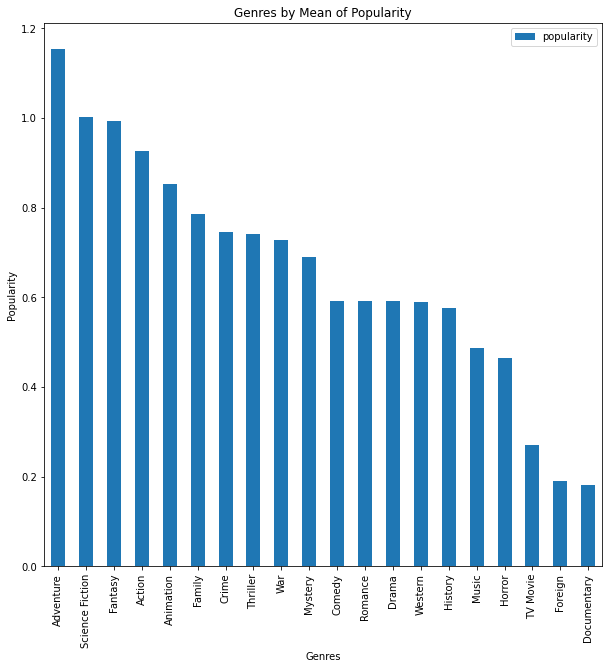

In [23]:
#Bar chart Genres by Mean of Popularity

df_genres_groupby.plot(kind='bar', title='Genres by Mean of Popularity', ylabel='Popularity', xlabel='Genres', figsize=(10,10))

*Conclude: Movie with **Adventure Genres** have the highest Mean of Popularity which producer can focus on this genres to make more profit.*

### 3.2 Explore CORRELATION

#### Budget vs Revenue

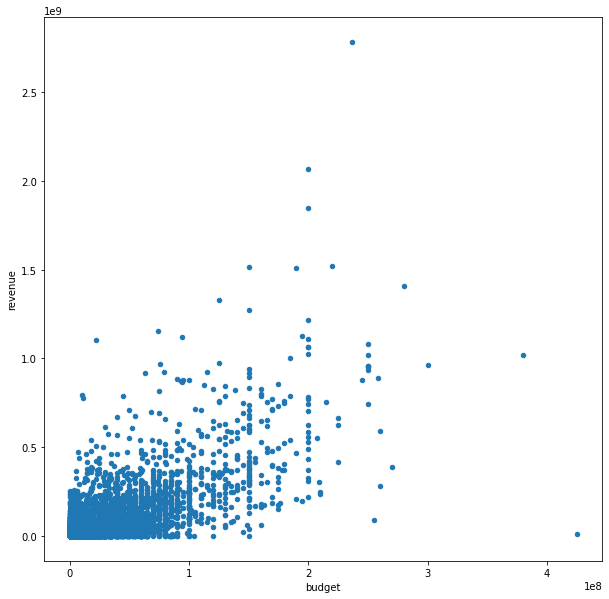

In [24]:
# scatter plot chart
df.plot(x='budget',y='revenue',kind='scatter',figsize=[10,10]);

In [25]:
# calculate correlation number
df['budget'].corr(df['revenue'])

0.7349279812889292

*Conclude: There is a **strong positive correlation** between Budget and Revenue of a movie*

#### Budget vs Popularity

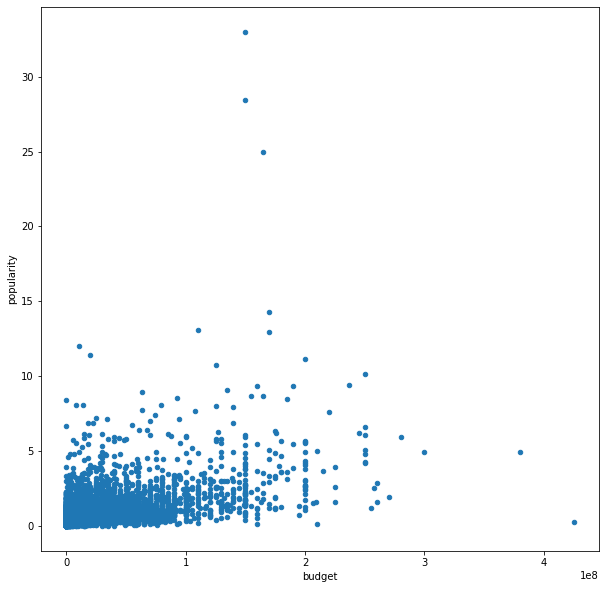

In [26]:
# scatter plot chart
df.plot(x='budget',y='popularity',kind='scatter',figsize=[10,10]);

In [27]:
# calculate correlation number
df['budget'].corr(df['popularity'])

0.5454807929309623

*Conclude: There is a **moderate positive correlation** between Budget and Popularity of a movie*

#### Budget vs Vote-Average

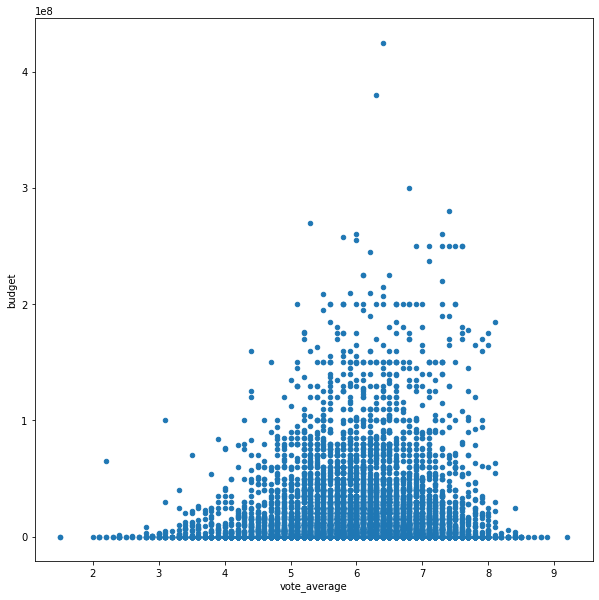

In [28]:
# scatter plot chart
df.plot(x='vote_average',y='budget',kind='scatter',figsize=[10,10]);

In [29]:
# calculate correlation number
df['budget'].corr(df['vote_average'])

0.08106672575599058

*Conclude: There is **no correlation** between Budget and Vote-Average of a movie*

<a id='conclusions'></a>
## Conclusions
> 1. Movie with **Adventure Genres** have the highest revenue-average which producer can focus on this genres to make more profit.
> 2. Movie with **Documentary Genres** have the highest vote-average
> 3. Movie with **Adventure Genres** have the highest Mean of Popularity which producer can focus on this genres to make more profit.
> 4. There is a **strong positive correlation** between Budget and Revenue of a movie
> 5. There is a **moderate positive correlation** between Budget and Popularity of a movie
> 6. There is **no correlation** between Budget and Vote-Average of a movie
